## Jayden Yap p2112790 CA1 Part B (Regression)

#### Setup

In [1]:
#dependencies
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import cross_val_score,cross_val_predict
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [2]:
#import dataset
pc_data=pd.read_csv('data/pc_data (regression).csv')
display(pc_data)
print(pc_data.info())


,Product ID,Brand,Type,Screen Size,Screen Specs,CPU,RAM,Hard Disk,GPU,Operating System,Weight,Price ($)
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,3568.93416
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,2394.77616
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,1531.80000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,6759.76680
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,4804.79040
...,...,...,...,...,...,...,...,...,...,...,...,...
15315,15315,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,1706.40200
15316,15316,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,4000.10600
15317,15317,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,616.82600
15318,15318,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,2042.06600


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15320 entries, 0 to 15319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        15320 non-null  int64  
 1   Brand             15320 non-null  object 
 2   Type              15320 non-null  object 
 3   Screen Size       15320 non-null  float64
 4   Screen Specs      15320 non-null  object 
 5   CPU               15320 non-null  object 
 6   RAM               15320 non-null  object 
 7   Hard Disk         15320 non-null  object 
 8   GPU               15320 non-null  object 
 9   Operating System  15320 non-null  object 
 10  Weight            15320 non-null  object 
 11  Price ($)         15320 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.4+ MB
None


In [3]:
print("UNIQUE VALUES IN EVERY COLUMN")
for column in pc_data:
    print(f"{column}: ({pc_data[column].dtypes}) \n{len(pc_data[column].unique())}")
#returns a list of unique values
#We have a very noisy dataset with a lot of information (118 different CPU and 110 different GPU)

UNIQUE VALUES IN EVERY COLUMN
Product ID: (int64) 
15320
Brand: (object) 
19
Type: (object) 
6
Screen Size: (float64) 
18
Screen Specs: (object) 
40
CPU: (object) 
118
RAM: (object) 
9
Hard Disk: (object) 
39
GPU: (object) 
110
Operating System: (object) 
9
Weight: (object) 
179
Price ($): (float64) 
9328


### Data Cleaning and Processing

We must present our data as features (i.e real-numbered vectors)

In [4]:
#drop column
df=pc_data.drop(['Product ID'],axis=1)
#rename columns
df.columns=["Brand",'Type','ScreenSize','ScreenSpecs','CPU','RAM','Storage','GPU','OS','Weight','Price']
#removing unicode characters
df.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
df

,Brand,Type,ScreenSize,ScreenSpecs,CPU,RAM,Storage,GPU,OS,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,3568.93416
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,2394.77616
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,1531.80000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,6759.76680
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,4804.79040
...,...,...,...,...,...,...,...,...,...,...,...
15315,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,1706.40200
15316,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,4000.10600
15317,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,616.82600
15318,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,2042.06600


In [5]:
#Check for null values
print(pd.isnull(df).sum())
print(f"Total rows with null values: {df.isnull().any(axis=1).sum()}")
#no null values!

Brand          0
Type           0
ScreenSize     0
ScreenSpecs    0
CPU            0
RAM            0
Storage        0
GPU            0
OS             0
Weight         0
Price          0
dtype: int64
Total rows with null values: 0


#### Screen Specs column

In [6]:
#extract Touchscreen column
df['Touchscreen'] = df['ScreenSpecs'].apply(lambda x:1 if 'Touchscreen' in x else 0)
#extract IPS column
df['IPS'] = df['ScreenSpecs'].apply(lambda x:1 if 'IPS' in x else 0)

In [7]:
#functions to extract X and Y resolutions of screen
def findXresolution(s):
  return s.split()[-1].split("x")[0]
def findYresolution(s):
  return s.split()[-1].split("x")[1]
df['Xres'] = df['ScreenSpecs'].apply(lambda x: findXresolution(x))
df['Yres'] = df['ScreenSpecs'].apply(lambda y: findYresolution(y))
#convert to numeric
df['Xres'] = df['Xres'].astype('int')
df['Yres'] = df['Yres'].astype('int')
df

,Brand,Type,ScreenSize,ScreenSpecs,CPU,RAM,Storage,GPU,OS,Weight,Price,Touchscreen,IPS,Xres,Yres
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,3568.93416,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,2394.77616,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,1531.80000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,6759.76680,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,4804.79040,0,1,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15315,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,1706.40200,1,1,1920,1080
15316,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,4000.10600,1,1,3200,1800
15317,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,616.82600,0,0,1366,768
15318,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,2042.06600,0,0,1366,768


In [8]:
#creating Pixels Per Inch (PPI) column
#this is a effective way to measure the pixel density and is usually a big factor for display quality
df['PixelDensity'] = (((df['Xres']**2) + (df['Yres']**2))**0.5/df['ScreenSize']).astype('float')
df.corr()['Price'].sort_values(ascending=False)
#as we can see, ScreenSize's correlation with Price was very low, but when combined with resolution, it becomes significant

Price           1.000000
Xres            0.554456
Yres            0.550575
PixelDensity    0.471495
IPS             0.248608
Touchscreen     0.191837
ScreenSize      0.069650
Name: Price, dtype: float64

In [9]:
#to reduce unnecsary noise from data, we delete the old columns
df.drop(columns = ['ScreenSpecs', 'ScreenSize','Xres','Yres'], inplace=True)
df

,Brand,Type,CPU,RAM,Storage,GPU,OS,Weight,Price,Touchscreen,IPS,PixelDensity
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,3568.93416,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,2394.77616,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,1531.80000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,6759.76680,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,4804.79040,0,1,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...
15315,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,1706.40200,1,1,157.350512
15316,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,4000.10600,1,1,276.053530
15317,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,616.82600,0,0,111.935204
15318,HP,Notebook,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,2042.06600,0,0,100.454670


#### RAM column

In [10]:
#just need to remove "GB"
df["RAM"]=df['RAM'].str.replace(r'\D','')
#convert to numeric
df["RAM"] = df["RAM"].astype(int)
df.RAM

0         8
1         8
2         8
3        16
4         8
         ..
15315     4
15316    16
15317     2
15318     6
15319     4
Name: RAM, Length: 15320, dtype: int32

#### GPU column

In [11]:
#for now let's just extract brand of GPU
df['GPUBrand'] = df['GPU'].apply(lambda x:x.split()[0])
#there is only 1 row of ARM GPU so remove it
df = df[df['GPUBrand'] != 'ARM']
#df.drop(columns=['GPU'],inplace=True)
print(df.GPUBrand.unique())

['Intel' 'AMD' 'Nvidia']


#### Storage column
for this column we need to seperate 4 types of information HDD,SSD,Hybrid and Flash Storage

In [12]:
df['Storage'] = df['Storage'].astype(str).replace('.0', '', regex=True)
df["Storage"] = df["Storage"].str.replace('GB', '')
df["Storage"] = df["Storage"].str.replace('TB', '000')

new = df["Storage"].str.split("+", n = 1, expand = True)
df["first"]= new[0]
df["first"]=df["first"].str.strip()
df["second"]= new[1]
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df['first'] = df['first'].str.replace(r'D', '')
df["second"].fillna("0", inplace = True)
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df['second'] = df['second'].str.replace(r'D', '')
#binary encoding
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
#only keep integert(digits)
df["first"]=df['first'].str.replace(r'\D','')
df["second"]=df['second'].str.replace(r'\D','')
#convert to numeric
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)
#finalize the columns by keeping value
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])
#Drop the old columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage','Storage'],inplace=True)
df

,Brand,Type,CPU,RAM,GPU,OS,Weight,Price,Touchscreen,IPS,PixelDensity,GPUBrand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37kg,3568.93416,0,1,226.983005,Intel,0,128,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34kg,2394.77616,0,0,127.677940,Intel,0,0,0,128
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86kg,1531.80000,0,0,141.211998,Intel,0,256,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83kg,6759.76680,0,1,220.534624,AMD,0,512,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37kg,4804.79040,0,1,226.983005,Intel,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15315,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,1.8kg,1706.40200,1,1,157.350512,Intel,0,128,0,0
15316,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,1.3kg,4000.10600,1,1,276.053530,Intel,0,512,0,0
15317,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows 10,1.5kg,616.82600,0,0,111.935204,Intel,0,0,0,64
15318,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows 10,2.19kg,2042.06600,0,0,100.454670,AMD,1000,0,0,0


#### Operating System Column

In [13]:
#3 main OS (Windows, Mac, Linux(/none)) with slightly different versions
def getOS(string):
    if string == 'Windows 10' or string == 'Windows 7' or string == 'Windows 10 S':
        return 'Windows'
    elif string == 'macOS' or string == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/Linux'
df['OS'] = df['OS'].apply(getOS)
print(df.OS.unique())

['Mac' 'Others/Linux' 'Windows']


#### Weight column

In [14]:
df['Weight'] = df['Weight'].str.replace('kg', '')
df['Weight'] = df['Weight'].astype('float64')
df

,Brand,Type,CPU,RAM,GPU,OS,Weight,Price,Touchscreen,IPS,PixelDensity,GPUBrand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,Mac,1.37,3568.93416,0,1,226.983005,Intel,0,128,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,Mac,1.34,2394.77616,0,0,127.677940,Intel,0,0,0,128
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,Others/Linux,1.86,1531.80000,0,0,141.211998,Intel,0,256,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,Mac,1.83,6759.76680,0,1,220.534624,AMD,0,512,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,Mac,1.37,4804.79040,0,1,226.983005,Intel,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15315,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows,1.80,1706.40200,1,1,157.350512,Intel,0,128,0,0
15316,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows,1.30,4000.10600,1,1,276.053530,Intel,0,512,0,0
15317,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows,1.50,616.82600,0,0,111.935204,Intel,0,0,0,64
15318,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows,2.19,2042.06600,0,0,100.454670,AMD,1000,0,0,0


### Data Visualisation


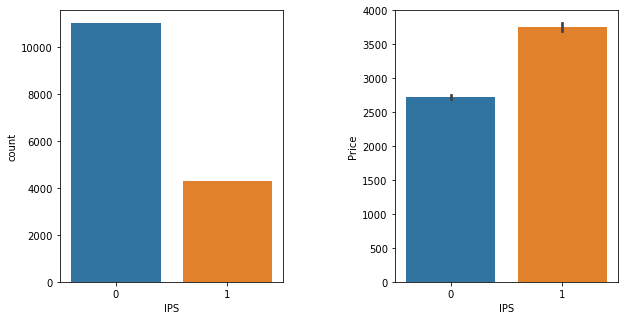

In [15]:
#how many laptops in df are touchscreen
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.5, hspace=1)
plt.subplot(1,2,1)
sns.countplot(df['IPS'])
plt.subplot(1,2,2)
sns.barplot(df['IPS'],df.Price)
plt.show()
#most screens with IPS
#from research, IPS is widely regarded as the superior screen panel technology
#makes sense that IPS laptops are more expensive

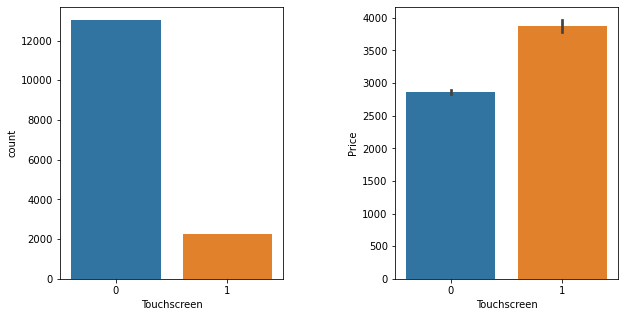

In [16]:
#how many laptops in df are touchscreen
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.5, hspace=1)
plt.subplot(1,2,1)
sns.countplot(df['Touchscreen'])
plt.subplot(1,2,2)
sns.barplot(df['Touchscreen'],df.Price)
plt.show()
#most laptops are without touchscreen, and touchscreen laptops are more expensive on average 

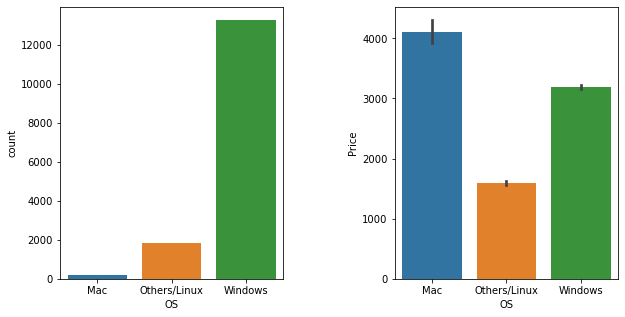

In [17]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.5, hspace=1)
plt.subplot(1,2,1)
sns.countplot(df['OS'])
plt.subplot(1,2,2)
sns.barplot(df['OS'],df.Price)
plt.show()
#windows by far most common laptop
#mac most expensive OS , followed by windows, then linux, makes sense as apple creates a few expensive products and linux laptops are usually budget ones

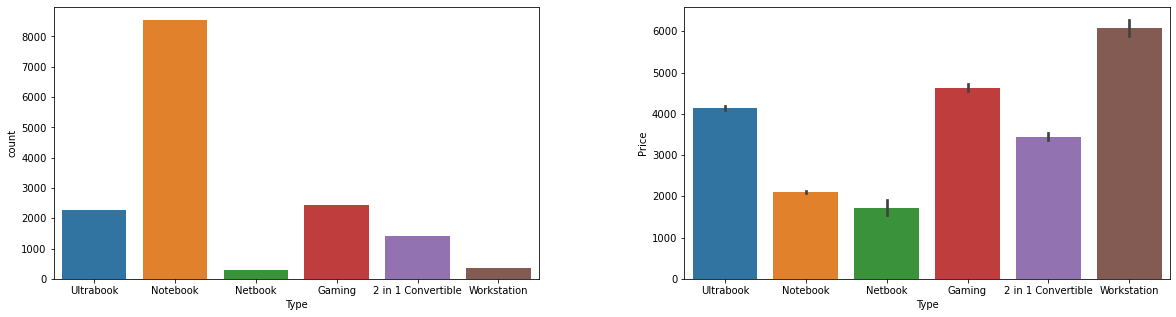

In [18]:
plt.figure(figsize=(20,5))
plt.subplots_adjust(wspace=0.3, hspace=1)
plt.subplot(1,2,1)
sns.countplot(df['Type'])
plt.subplot(1,2,2)
sns.barplot(df['Type'],df.Price)
plt.show()
#notebook most common laptop followed by gaming laptops
#workstations most expensive laptops as expected as they have the most expensive specs followed by gaming laptops

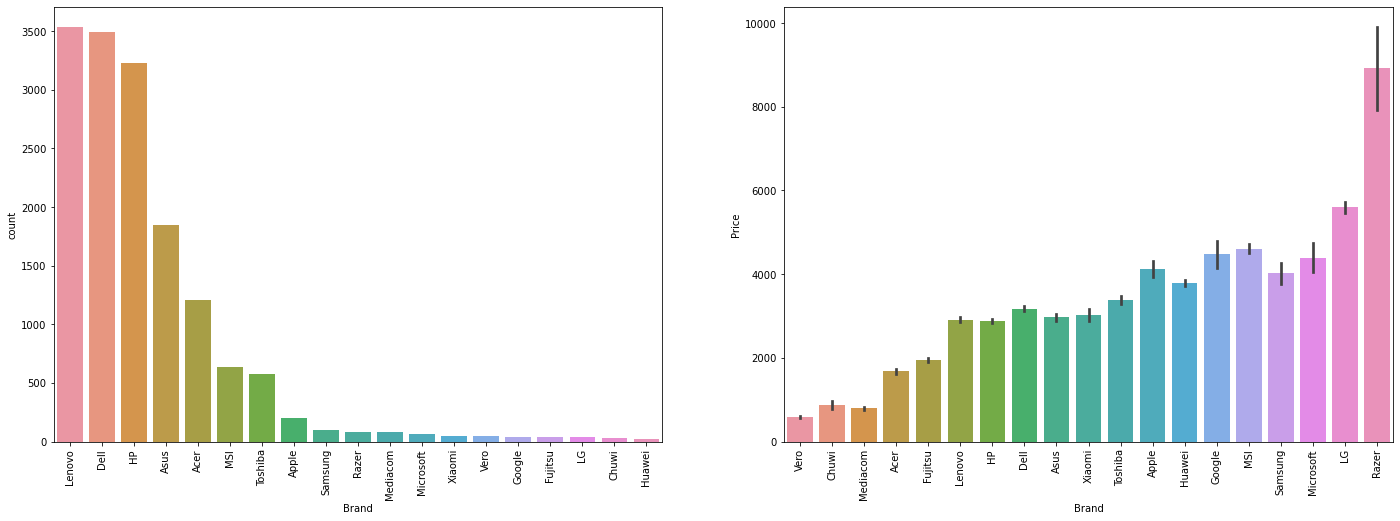

In [19]:
plt.figure(figsize=(24,8))
plt.subplots_adjust(wspace=0.2, hspace=1)
plt.subplot(1,2,1)
plt.xticks(rotation=90)
sns.countplot(df['Brand'],order = df['Brand'].value_counts().index)
plt.subplot(1,2,2)
plt.xticks(rotation=90)
result = df.groupby(["Brand"])['Price'].aggregate(np.median).reset_index().sort_values('Price')
sns.barplot(df['Brand'],df.Price
,order=result['Brand']
)
plt.show()
#lenovo, dell and HP most common brands

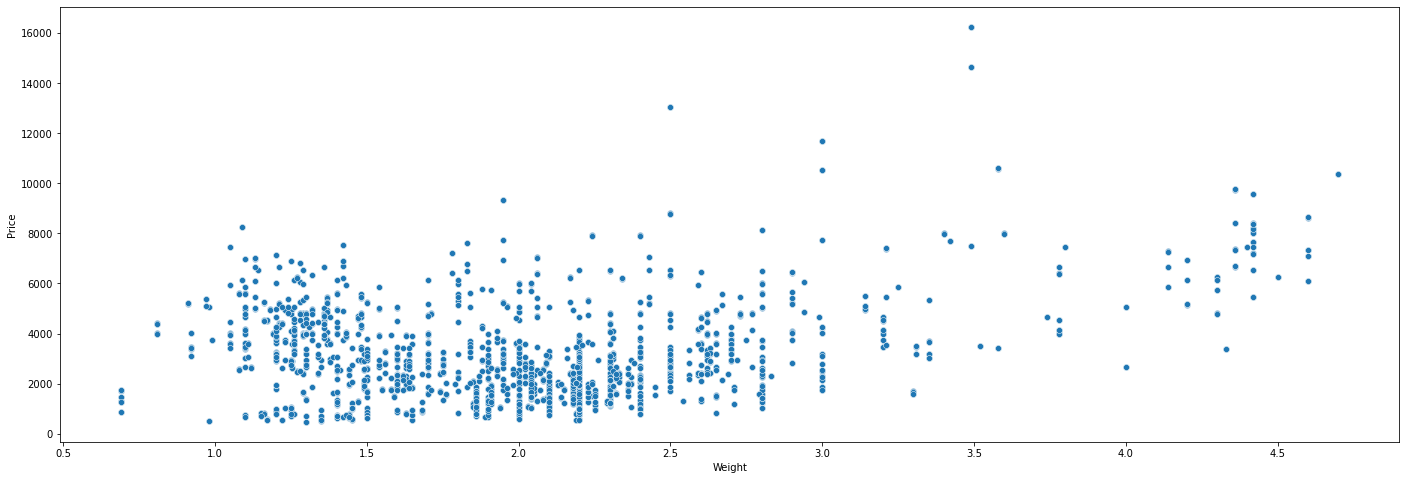

In [20]:
plt.figure(figsize=(24,8))
sns.scatterplot(data=df,x='Weight',y='Price')
plt.show()
#not much of a clear relationship, there are some points on the right (heavy weight) that are generally of higher price but there are too few data points to consider it a clear relationship
#this makes sense because being a light weight laptop is also something demanded for and can cause a laptop be expensive

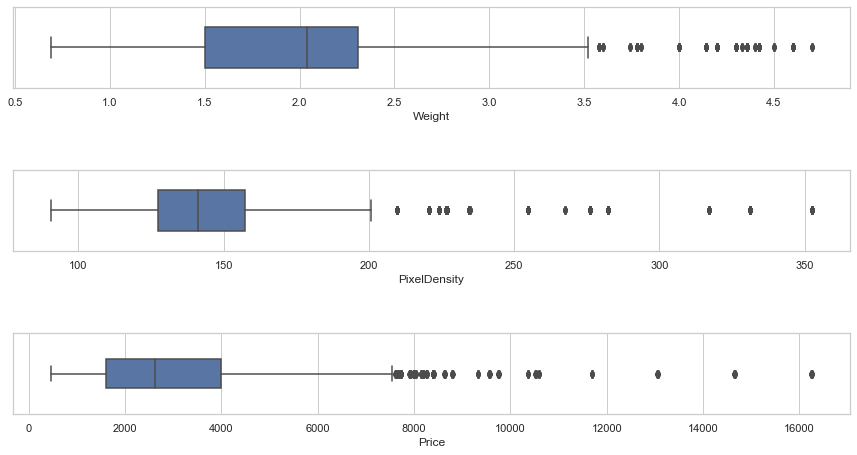

In [21]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,7.5))
plt.subplots_adjust(wspace=1, hspace=1)
plt.subplot(3,1,1)
sns.boxplot('Weight',data=df,width=0.5)
plt.subplot(3,1,2)
sns.boxplot('PixelDensity',data=df,width=0.5)
plt.subplot(3,1,3)
sns.boxplot('Price',data=df,width=0.35)
plt.show()
#Median weight is ~2.1kg
#Median PixelDensity is ~140PPI which is quite high compared to gaming monitors (eg. 1080p 24 inch monitor is only 91 PPI)
#Median Price is ~$2800

### Categorical columns (encoding)
We will use Binary Encoding to turn our categorical columns into numbered columns (features)

In [22]:
# Create train and test sets (test set becomes holdout set for testing later)
X=df.drop('Price',axis=1)
y=df['Price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,
                                                    random_state=1 #fixed splits
                                                    )

In [23]:
#INSTALL IF NEEDED
#!pip install category_encoders

In [24]:
from category_encoders import BinaryEncoder 

In [25]:
#binary encoding for GPU and CPU and Brand columns (less columns than one hot encoding)
encoder=BinaryEncoder(
    #cols=['CPU','GPU','Brand'] #only encode cpu and gpu columns
    ) 
encoder.fit(X_train)
X_train=encoder.transform(X_train)
X_test=encoder.transform(X_test)

In [30]:
print(len(df.columns))

16


### Testing Models

Our task is to predict the price($) of laptops given it's specs.
I will try many models while recording their scores

In [159]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,mean_squared_error
#dictionary to store scores
R2List={}
MAPEList={}
RMSEList={}

#### Linear Regression

In [160]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

#R-squared score
print('R-squared value:')
R2=reg.score(X_test, y_test)
print(R2)
R2List['Linear']=R2

#Mean Absolute % Error
print('Mean Absolute % Error:')
mape=mean_absolute_percentage_error(y_test,y_pred)
print(mape)
MAPEList['Linear']=mape

#Root Mean Squared Error
print('Root Mean Squared Error:')
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)
RMSEList['Linear']=rmse

R-squared value:
0.7224363670330862
Mean Absolute % Error:
0.2879147883435741
Root Mean Squared Error:
996.5439607100187


#### Lasso Regression
we will be able to use lasso to plot coefficients

In [161]:
from sklearn.linear_model import Lasso
reg=Lasso(random_state=1)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

#R-squared score
print('R-squared value:')
R2=reg.score(X_test, y_test)
print(R2)
R2List['Lasso']=R2

#Mean Absolute % Error
print('Mean Absolute % Error:')
mape=mean_absolute_percentage_error(y_test,y_pred)
print(mape)
MAPEList['Lasso']=mape

#Root Mean Squared Error
print('Root Mean Squared Error:')
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)
RMSEList['Lasso']=rmse



R-squared value:
0.7223670206231003
Mean Absolute % Error:
0.28621151574350107
Root Mean Squared Error:
996.668441048936


Plotting Coefficients

We can find out which features are most important

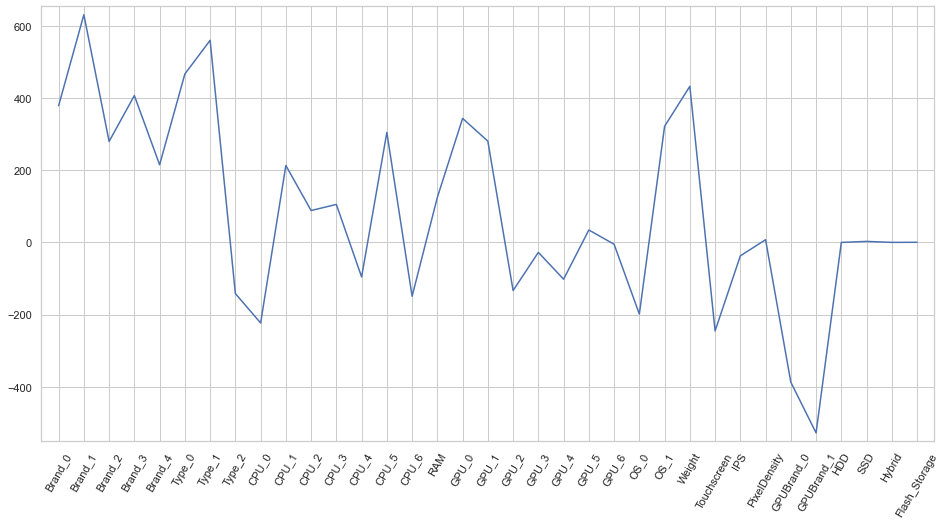

In [162]:
#Coefficients (most important variables)
lasso_coef=reg.fit(X_train,y_train).coef_
lasso_coef
# Plot the coefficients
plt.figure(figsize=(16,8))
plt.plot(range(len(X_train.columns)), lasso_coef)
plt.xticks(range(len(X_train.columns)), X_train.columns.values, rotation=60)
plt.margins(0.02)
plt.show()
#GPU brand has little effect on model
#This is logical because Brand does not indicate any change in performance in practicality (Nvidia vs AMD hold about the same value, what matters more is the GPU model and performance)

#### Bayesian Ridge

In [163]:
from sklearn.linear_model import BayesianRidge
reg=BayesianRidge()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

#R-squared score
print('R-squared value:')
R2=reg.score(X_test, y_test)
print(R2)
R2List['BayesianRidge']=R2

#Mean Absolute % Error
print('Mean Absolute % Error:')
mape=mean_absolute_percentage_error(y_test,y_pred)
print(mape)
MAPEList['BayesianRidge']=mape

#Root Mean Squared Error
print('Root Mean Squared Error:')
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)
RMSEList['BayesianRidge']=rmse


R-squared value:
0.7224800112517886
Mean Absolute % Error:
0.28731116919977123
Root Mean Squared Error:
996.4656091407468


#### Ridge Regression

In [164]:
from sklearn.linear_model import Ridge
reg=Ridge(random_state=1)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

#R-squared score
print('R-squared value:')
R2=reg.score(X_test, y_test)
print(R2)
R2List['Ridge']=R2

#Mean Absolute Error
print('Mean Absolute % Error:')
mae=mean_absolute_percentage_error(y_test,y_pred)
print(mae)
MAPEList['Ridge']=mae

#Root Mean Squared Error
print('Root Mean Squared Error:')
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)
RMSEList['Ridge']=rmse


R-squared value:
0.7224438076482479
Mean Absolute % Error:
0.28785206567370447
Root Mean Squared Error:
996.5306035030293


#### Elastic Net Regression

In [165]:
from sklearn.linear_model import ElasticNet
reg=ElasticNet(random_state=1)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

#R-squared score
print('R-squared value:')
R2=reg.score(X_test, y_test)
print(R2)
R2List['ElasticNet']=R2

#Mean Absolute Error
print('Mean Absolute % Error:')
mae=mean_absolute_percentage_error(y_test,y_pred)
print(mae)
MAPEList['ElasticNet']=mae

#Root Mean Squared Error
print('Root Mean Squared Error:')
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)
RMSEList['ElasticNet']=rmse

R-squared value:
0.6783231472225622
Mean Absolute % Error:
0.3030791898227595
Root Mean Squared Error:
1072.81561342881


#### Kernel Ridge

In [166]:
from sklearn.kernel_ridge import KernelRidge
reg=KernelRidge()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

#R-squared score
print('R-squared value:')
R2=reg.score(X_test, y_test)
print(R2)
R2List['KernelRidge']=R2

#Mean Absolute Error
print('Mean Absolute % Error:')
mae=mean_absolute_percentage_error(y_test,y_pred)
print(mae)
MAPEList['KernelRidge']=mae

#Root Mean Squared Error
print('Root Mean Squared Error:')
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)
RMSEList['KernelRidge']=rmse

R-squared value:
0.7211913186860792
Mean Absolute % Error:
0.289251154363028
Root Mean Squared Error:
998.7765246950404


#### Stochastic Gradient Descent

In [167]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#X
scaler.fit(X_train)
X_trainScaled=scaler.transform(X_train)
X_testScaled=scaler.transform(X_test)
#y
# scaler.fit(y_train)
# y_trainScaled=scaler.transform(y_train)
# y_testScaled=scaler.transform(y_test)

reg=SGDRegressor(random_state=1)
reg.fit(X_trainScaled,y_train)
y_pred=reg.predict(X_testScaled)

#R-squared score
print('R-squared value:')
R2=reg.score(X_testScaled, y_test)
print(R2)
R2List['SGD']=R2

#Mean Absolute Error
print('Mean Absolute % Error:')
mae=mean_absolute_percentage_error(y_test,y_pred)
print(mae)
MAPEList['SGD']=mae

#Root Mean Squared Error
print('Root Mean Squared Error:')
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)
RMSEList['SGD']=rmse

R-squared value:
0.721001442717127
Mean Absolute % Error:
0.28384498997612606
Root Mean Squared Error:
999.1165632161192


#### PLSRegression

In [168]:
from sklearn.cross_decomposition import PLSRegression
reg=PLSRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

#R-squared score
print('R-squared value:')
R2=reg.score(X_test, y_test)
print(R2)
R2List['PLS']=R2

#Mean Absolute Error
print('Mean Absolute % Error:')
mae=mean_absolute_percentage_error(y_test,y_pred)
print(mae)
MAPEList['PLS']=mae

#Root Mean Squared Error
print('Root Mean Squared Error:')
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)
RMSEList['PLS']=rmse

R-squared value:
0.6781295675374441
Mean Absolute % Error:
0.33467751454884204
Root Mean Squared Error:
1073.1383660178917


#### Histogram-based Gradient Boosting

In [169]:
from sklearn.ensemble import HistGradientBoostingRegressor
reg=HistGradientBoostingRegressor(random_state=1)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

#R-squared score
print('R-squared value:')
R2=reg.score(X_test, y_test)
print(R2)
R2List['HistGradientBoost']=R2

#Mean Absolute Error
print('Mean Absolute % Error:')
mae=mean_absolute_percentage_error(y_test,y_pred)
print(mae)
MAPEList['HistGradientBoost']=mae

#Root Mean Squared Error
print('Root Mean Squared Error:')
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)
RMSEList['HistGradientBoost']=rmse

R-squared value:
0.9733831002965355
Mean Absolute % Error:
0.08955417535646874
Root Mean Squared Error:
308.59857335933725


#### Gradient Boost

In [170]:
from sklearn.ensemble import GradientBoostingRegressor
reg=GradientBoostingRegressor(random_state=1)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

#R-squared score
print('R-squared value:')
R2=reg.score(X_test, y_test)
print(R2)
R2List['GradientBoost']=R2

#Mean Absolute % Error
print('Mean Absolute % Error:')
mape=mean_absolute_percentage_error(y_test,y_pred)
print(mape)
MAPEList['GradientBoost']=mape

#Root Mean Squared Error
print('Root Mean Squared Error:')
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)
RMSEList['GradientBoost']=rmse


R-squared value:
0.8776328773177947
Mean Absolute % Error:
0.1877501924571904
Root Mean Squared Error:
661.6793086736526


#### Adaboost

In [171]:
from sklearn.ensemble import AdaBoostRegressor
reg=AdaBoostRegressor(random_state=1)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

#R-squared score
print('R-squared value:')
R2=reg.score(X_test, y_test)
print(R2)
R2List['Adaboost']=R2

#Mean Absolute % Error
print('Mean Absolute % Error:')
mape=mean_absolute_percentage_error(y_test,y_pred)
print(mape)
MAPEList['Adaboost']=mape

#Root Mean Squared Error
print('Root Mean Squared Error:')
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)
RMSEList['Adaboost']=rmse


R-squared value:
0.6868704491956281
Mean Absolute % Error:
0.4680154871974934
Root Mean Squared Error:
1058.4667195831337


#### Random Forest

In [172]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(random_state=1)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

#R-squared score
print('R-squared value:')
R2=reg.score(X_test, y_test)
print(R2)
R2List['RandomForest']=R2

#Mean Absolute % Error
print('Mean Absolute % Error:')
mape=mean_absolute_percentage_error(y_test,y_pred)
print(mape)
MAPEList['RandomForest']=mape

#Root Mean Squared Error
print('Root Mean Squared Error:')
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)
RMSEList['RandomForest']=rmse

R-squared value:
0.9988730218647198
Mean Absolute % Error:
0.007000455197935757
Root Mean Squared Error:
63.499882999868966


#### K-Neighbours

In [173]:
from sklearn.neighbors import KNeighborsRegressor
reg=KNeighborsRegressor()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

#R-squared score
print('R-squared value:')
R2=reg.score(X_test, y_test)
print(R2)
R2List['KNN']=R2

#Mean Absolute % Error
print('Mean Absolute % Error:')
mape=mean_absolute_percentage_error(y_test,y_pred)
print(mape)
MAPEList['KNN']=mape

#Root Mean Squared Error
print('Root Mean Squared Error:')
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)
RMSEList['KNN']=rmse


R-squared value:
0.9974519252975156
Mean Absolute % Error:
0.008906396430151097
Root Mean Squared Error:
95.48194519196367


#### Evaluate Performance

In [174]:
#see the best models
R2List = dict(sorted(R2List.items(), key=lambda item: item[1], reverse=True))
MAPEList = dict(sorted(MAPEList.items(), key=lambda item: item[1]))
RMSEList = dict(sorted(RMSEList.items(), key=lambda item: item[1]))

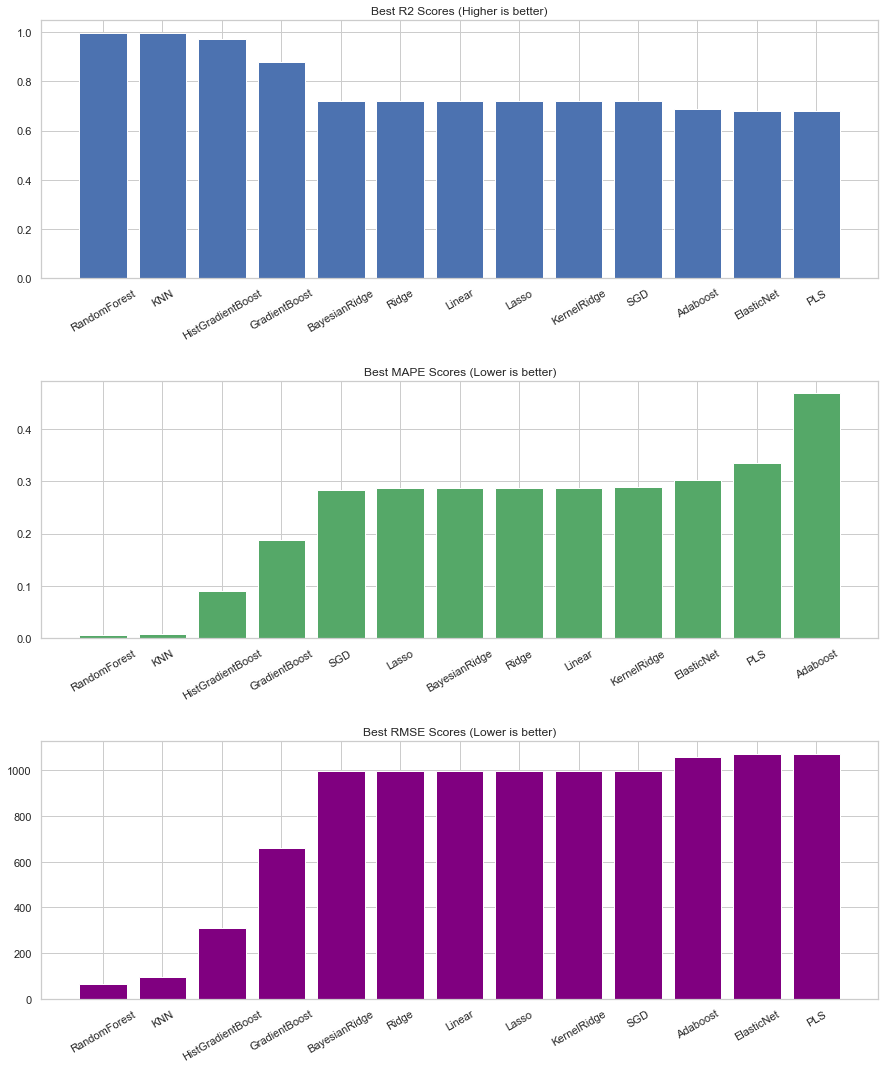

In [197]:
plt.figure(figsize=(15,18))
plt.subplots_adjust(hspace=0.4)
plt.subplot(3,1,1)
plt.bar(*zip(*R2List.items()))
plt.title('Best R2 Scores (Higher is better)')
plt.xticks(rotation=30)

plt.subplot(3,1,2)
plt.bar(*zip(*MAPEList.items()), color='g')
plt.title('Best MAPE Scores (Lower is better)')
plt.xticks(rotation=30)

plt.subplot(3,1,3)
plt.bar(*zip(*RMSEList.items()), color='purple')
plt.title('Best RMSE Scores (Lower is better)')
plt.xticks(rotation=30)
plt.show()

### Improving Models
The best models tested earlier were RandomForest, KNN and Hist Gradient Boosting

Let's implement GridSearch Cross Validation for hyperparameter tuning, this will improve our models

In [176]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
finalR2List={}
finalMAPEList={}
finalRMSEList={}
featureList=X_train.columns
importanceList={}

#### Random Forest

In [ ]:
# Create the random grid
param_grid = {
    'n_estimators': [100]
    'max_features':['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(5, 30, num = 6)],
    'min_samples_split': [2, 5, 8, 10, 15],
    'min_samples_leaf': [1, 2, 4, 5],
    'bootstrap': [True, False],
    'random_state': [1]
}
               
#instantiate classifier
reg=RandomForestRegressor()
reg_cv = GridSearchCV(reg, param_grid, cv=3,scoring='r2')
reg_cv.fit(X_train,y_train)

#Output
print(f"Tuned Random Forest Parameters: {reg_cv.best_params_}") 
print(f"Best score is {reg_cv.best_score_}")

Tuned Random Forest Parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 1}
Best score is 0.9985718413026904


Top 5 Most important Features
{'RAM': 0.19843329494970416, 'SSD': 0.15111288306468298, 'Weight': 0.14068041513734847, 'PixelDensity': 0.09064566336422049, 'Type_0': 0.04349451314723162}
R-squared value:
0.998886534648747
Mean Absolute % Error:
0.0065796914765377
Root Mean Squared Error:
63.11804425338142


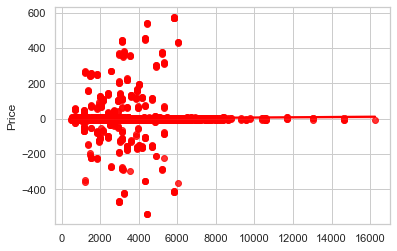

In [177]:
reg=RandomForestRegressor(bootstrap=False,max_depth=30,max_features='sqrt',min_samples_leaf=1,min_samples_split=5,n_estimators=300,random_state=1)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

#Feature importance
importance = reg.feature_importances_
impDict=dict(zip(featureList, importance))
print("Top 5 Most important Features")
print(dict(sorted(impDict.items(),key=lambda item: item[1],reverse=True)[0:5]))


#R-squared score
print('R-squared value:')
R2=reg.score(X_test, y_test)
print(R2)
finalR2List['RandomForest']=R2

#Mean Absolute % Error
print('Mean Absolute % Error:')
mape=mean_absolute_percentage_error(y_test,y_pred)
print(mape)
finalMAPEList['RandomForest']=mape

#Root Mean Squared Error
print('Root Mean Squared Error:')
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)
finalRMSEList['RandomForest']=rmse

#minimal improvement in scores
sns.regplot(x = y_pred, y = y_test-y_pred, scatter = True, color = 'red')
#plt.scatter(y_test-y_pred,y_pred)
plt.show()

#### KNN

In [ ]:
# Create the random grid
param_grid = {
    'n_neighbors':[1,2,3,5,7,10],
    'weights':['uniform','distance'],
    'algorithm':['ball_tree','kd_tree','brute'],
    'leaf_size':[20,30,40],
    'p':[1,2,4]
}
               
#instantiate classifier
reg=KNeighborsRegressor()
reg_cv = GridSearchCV(reg, param_grid, cv=3,scoring='r2')
reg_cv.fit(X_train,y_train)

#Output
print(f"Tuned KNN Parameters: {reg_cv.best_params_}") 
print(f"Best score is {reg_cv.best_score_}")

KeyboardInterrupt: 

R-squared value:
0.9988734158345781
Mean Absolute % Error:
0.006595152788919641
Root Mean Squared Error:
63.48878286142101


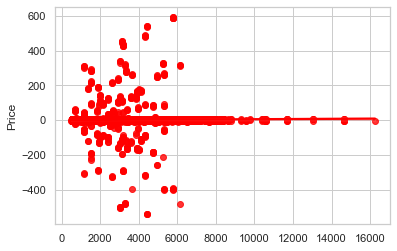

In [178]:
reg=KNeighborsRegressor(algorithm='brute',leaf_size=20,n_neighbors=10,p=1, weights='distance')
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)


#R-squared score
print('R-squared value:')
R2=reg.score(X_test, y_test)
print(R2)
finalR2List['KNN']=R2

#Mean Absolute % Error
print('Mean Absolute % Error:')
mape=mean_absolute_percentage_error(y_test,y_pred)
print(mape)
finalMAPEList['KNN']=mape

#Root Mean Squared Error
print('Root Mean Squared Error:')
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)
finalRMSEList['KNN']=rmse

#minimal improvement in scores
sns.regplot(x = y_pred, y = y_test-y_pred, data = None, scatter = True, color = 'red')
plt.show()

#### Hist Gradient Boost

In [ ]:
# Create the random grid
param_grid = {
    'random_state':[1],
    'loss':['squared_error','absolute_error','poisson','quantile'],
    'learning_rate':[0.1, 0.4, 0.8, 1],
    'max_iter':[100,200,300],
    'max_leaf_nodes':[20,31,40,50],
}
               
#instantiate classifier
reg=HistGradientBoostingRegressor()
reg_cv = GridSearchCV(reg, param_grid, cv=3,scoring='r2')
reg_cv.fit(X_train,y_train)

#Output
print(f"Tuned HistGradientBoost Parameters: {reg_cv.best_params_}") 
print(f"Best score is {reg_cv.best_score_}")

Tuned HistGradientBoost Parameters: {'learning_rate': 1, 'loss': 'poisson', 'max_iter': 300, 'max_leaf_nodes': 50, 'random_state': 1}
Best score is 0.9985936726299739


R-squared value:
0.9988852086625423
Mean Absolute % Error:
0.006850236973568717
Root Mean Squared Error:
63.1556155858586


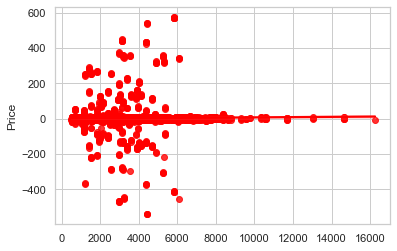

In [179]:
reg=HistGradientBoostingRegressor(learning_rate=1,loss='poisson',max_iter=300,max_leaf_nodes=50,random_state=1)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

#R-squared score
print('R-squared value:')
R2=reg.score(X_test, y_test)
print(R2)
finalR2List['HistGradientBoost']=R2

#Mean Absolute % Error
print('Mean Absolute % Error:')
mape=mean_absolute_percentage_error(y_test,y_pred)
print(mape)
finalMAPEList['HistGradientBoost']=mape

#Root Mean Squared Error
print('Root Mean Squared Error:')
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)
finalRMSEList['HistGradientBoost']=rmse

#minimal improvement in scores
sns.regplot(x = y_pred, y = y_test-y_pred, data = None, scatter = True, color = 'red')
plt.show()

#### Final Comparison and Conclusion

In [180]:
#see the best models
finalR2List = dict(sorted(finalR2List.items(), key=lambda item: item[1], reverse=True))
finalMAPEList = dict(sorted(finalMAPEList.items(), key=lambda item: item[1]))
finalRMSEList = dict(sorted(finalRMSEList.items(), key=lambda item: item[1]))
finalImpList=dict(sorted(impDict.items(), key=lambda item: item[1], reverse=True))

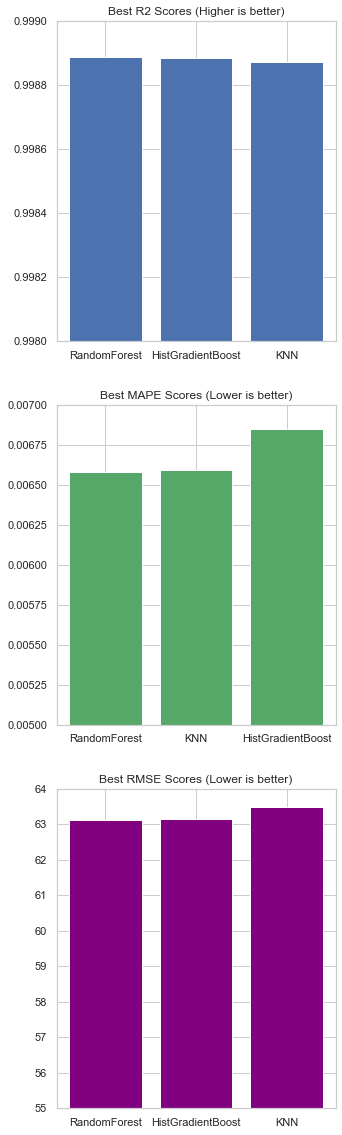

In [190]:
plt.figure(figsize=(5,20))

plt.subplot(3,1,1)
plt.bar(*zip(*finalR2List.items()))
ax1 = plt.gca()
ax1.set_ylim([0.998, 0.999])
plt.title('Best R2 Scores (Higher is better)')

plt.subplot(3,1,2)
plt.bar(*zip(*finalMAPEList.items()), color='g')
ax2 = plt.gca()
ax2.set_ylim([0.005, 0.007])
plt.title('Best MAPE Scores (Lower is better)')

plt.subplot(3,1,3)
plt.bar(*zip(*finalRMSEList.items()), color='purple')
ax2 = plt.gca()
ax2.set_ylim([55,64])
plt.title('Best RMSE Scores (Lower is better)')


plt.show()

We can conclude that Random Forest was the best model (with tuned parameters)

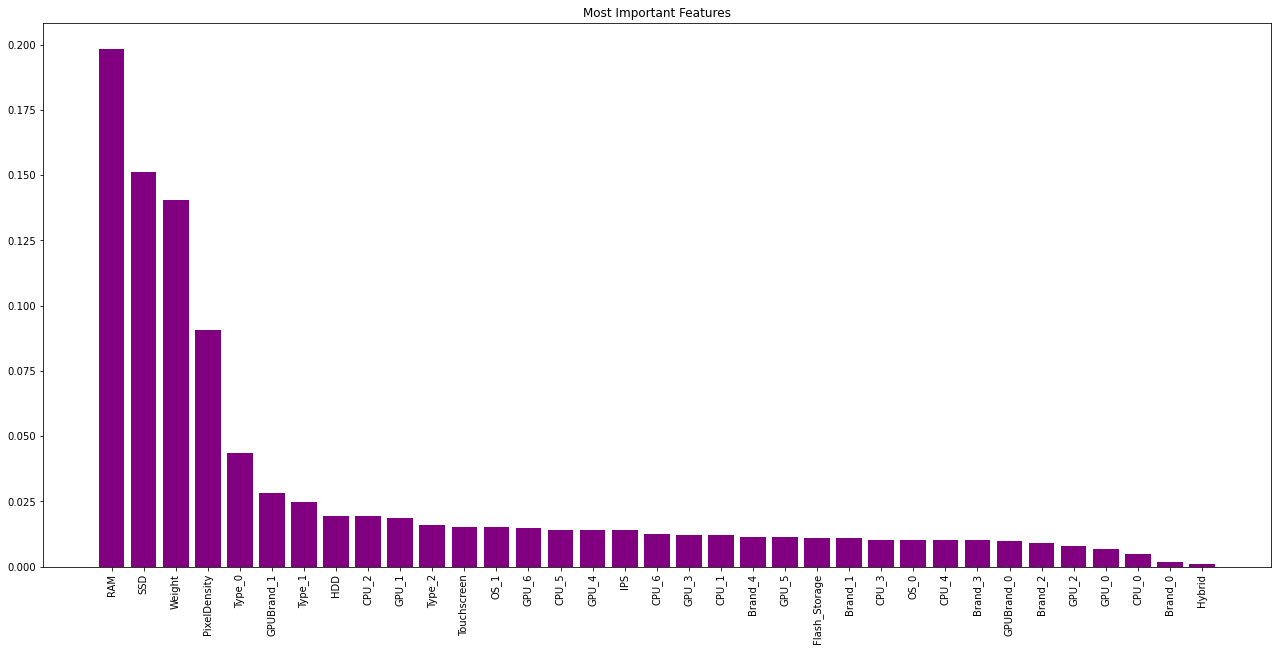

In [88]:
#feature importance (of Random Forest model)
plt.figure(figsize=(22,10))
plt.bar(*zip(*finalImpList.items()), color='purple')
ax2 = plt.gca()
plt.title('Most Important Features (Random Forest)')
plt.xticks(rotation=90)
plt.show()